# Linear Algebra Foundations

## Key Concepts
- Vectors, matrices, linear maps
- Eigenvalues/eigenvectors
- SVD (Singular Value Decomposition)
- PCA (Principal Component Analysis)

## References
- Bishop PRML: Chapter 1.2 (Probability distributions involve linear algebra)
- Matrix Cookbook: Sections 1-5
- MML Book: Chapters 2-4

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1. Matrix-Vector Multiplication with Visualization

Given matrix $A \in \mathbb{R}^{m \times n}$ and vector $x \in \mathbb{R}^n$:

$$y = Ax \quad \text{where} \quad y_i = \sum_{j=1}^{n} A_{ij} x_j$$

In [27]:
# Implement matrix-vector multiplication from scratch
def matrix_vector_mult(A, x):
    """Matrix-vector multiplication without using np.dot"""
    m, n = A.shape
    assert x.shape[0] == n, 'Dimensions must match'
    
    y = np.zeros(m)
    for i in range(m):
        for j in range(n):
            y[i] += A[i, j] * x[j]
    return y

# Test
A = np.array([[1, 2], [3, 4], [5, 6]])
x = np.array([1, 2])
print('Manual:', matrix_vector_mult(A, x))
print('NumPy:', A @ x)

Manual: [ 5. 11. 17.]
NumPy: [ 5 11 17]


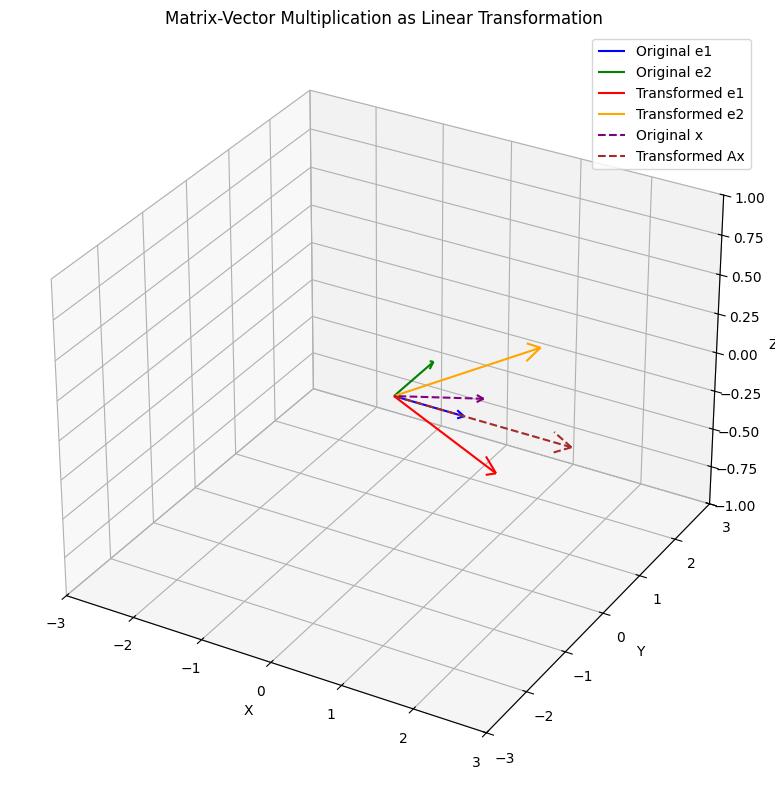

Transformation matrix A:
[[ 2  1]
 [-1  2]]
Original vector x: [1.  0.5]
Transformed vector Ax: [2.5 0. ]

Geometric interpretation:
- The matrix A transforms the basis vectors
- Any vector x is transformed by applying A to its components
- This shows how linear transformations work geometrically


In [28]:
def plot_matrix_vector_mult():
    """Visualize matrix-vector multiplication as linear transformation"""
    # Create figure
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Original basis vectors (2D for compatibility with 2x2 matrix)
    origin = np.array([0, 0, 0])
    e1 = np.array([1, 0])  # 2D vector
    e2 = np.array([0, 1])  # 2D vector
    
    # Transformation matrix (2D in 3D space)
    A = np.array([[2, 1], [-1, 2]])
    
    # Transformed basis vectors (now works: 2x2 @ 2x1 = 2x1)
    Ae1 = np.append(A @ e1, 0)
    Ae2 = np.append(A @ e2, 0)
    
    # Convert original vectors to 3D for plotting
    e1_3d = np.append(e1, 0)
    e2_3d = np.append(e2, 0)
    
    # Plot original basis
    ax.quiver(*origin, *e1_3d, color='blue', length=1.0, arrow_length_ratio=0.1, label='Original e1')
    ax.quiver(*origin, *e2_3d, color='green', length=1.0, arrow_length_ratio=0.1, label='Original e2')
    
    # Plot transformed basis
    ax.quiver(*origin, *Ae1, color='red', length=1.0, arrow_length_ratio=0.1, label='Transformed e1')
    ax.quiver(*origin, *Ae2, color='orange', length=1.0, arrow_length_ratio=0.1, label='Transformed e2')
    
    # Plot a sample vector and its transformation
    x = np.array([1, 0.5])
    x_3d = np.append(x, 0)
    Ax_3d = np.append(A @ x, 0)
    
    ax.quiver(*origin, *x_3d, color='purple', length=1.0, arrow_length_ratio=0.1, label='Original x', linestyle='--')
    ax.quiver(*origin, *Ax_3d, color='brown', length=1.0, arrow_length_ratio=0.1, label='Transformed Ax', linestyle='--')
    
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Matrix-Vector Multiplication as Linear Transformation')
    ax.legend()
    plt.tight_layout()
    plt.show()
    
    print('Transformation matrix A:')
    print(A)
    print(f'Original vector x: {x}')
    print(f'Transformed vector Ax: {A @ x}')
    print('\nGeometric interpretation:')
    print('- The matrix A transforms the basis vectors')
    print('- Any vector x is transformed by applying A to its components')
    print('- This shows how linear transformations work geometrically')

plot_matrix_vector_mult()

### Worked Example: Matrix-Vector Multiplication

**Problem:** Compute y = Ax where:
```
A = [[1, 2, 3],
     [4, 5, 6]]
x = [7, 8, 9]
```

**Step-by-step solution:**

1. **Row view (dot product):**
   ```
   y₁ = (1×7) + (2×8) + (3×9) = 7 + 16 + 27 = 50
   y₂ = (4×7) + (5×8) + (6×9) = 28 + 40 + 54 = 122
   ```

2. **Column view (linear combination):**
   ```
   y = 7×[1,4] + 8×[2,5] + 9×[3,6]
     = [7,28] + [16,40] + [27,54]
     = [50, 122]
   ```

3. **Geometric interpretation:**
   - The result is a linear combination of A's columns
   - x contains the weights for this combination
   - y lies in the column space of A

### ML Application: Feature Transformation

In machine learning, matrix-vector multiplication is used for:

1. **Linear regression:** ŷ = Xw (design matrix × weight vector)
2. **Neural networks:** z = Wx + b (weight matrix × input vector)
3. **PCA projection:** Z = XV (data × principal components)

**Key insight:** Understanding matrix-vector multiplication helps you understand how models transform input features into predictions.

## 2. Eigenvalue Decomposition with Visualization

For a square matrix $A$, eigenvalues $\lambda$ and eigenvectors $v$ satisfy:

$$Av = \lambda v$$

Decomposition: $A = V \Lambda V^{-1}$ where $\Lambda$ is diagonal matrix of eigenvalues.

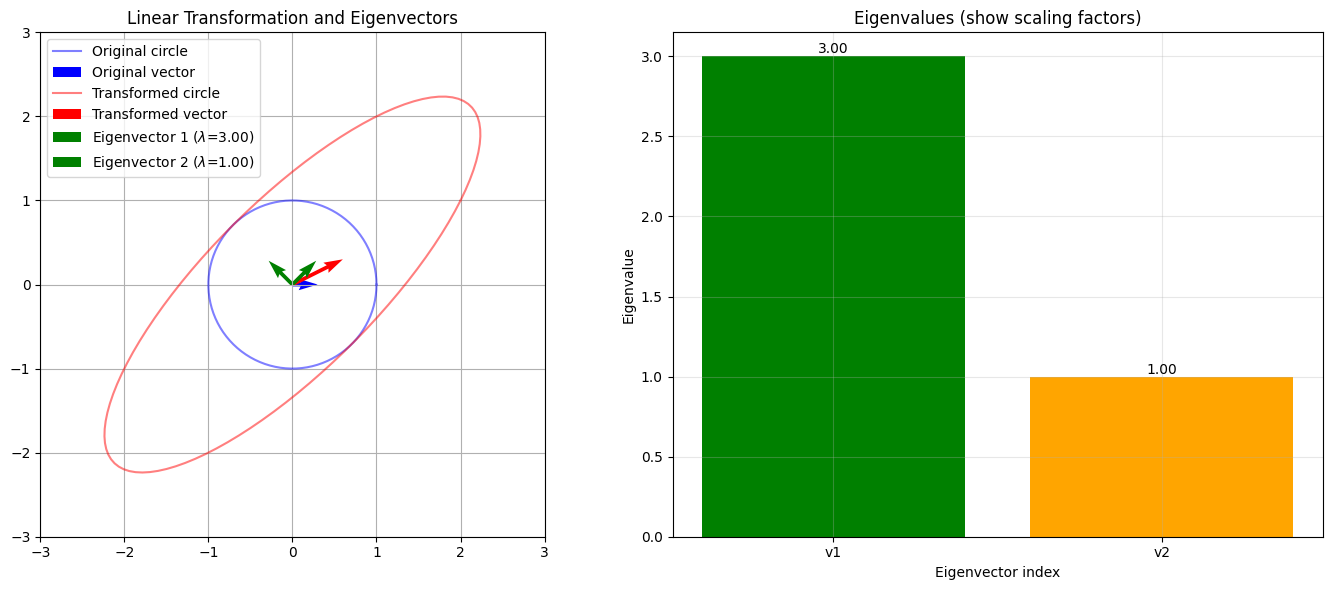

Matrix A:
[[2 1]
 [1 2]]

Eigenvalues: [3. 1.]
Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

Geometric interpretation:
- Eigenvectors are directions that only get scaled (not rotated)
- Eigenvalues indicate how much scaling occurs along each eigenvector
- The circle becomes an ellipse stretched along eigenvector directions


In [29]:
def plot_eigenvectors():
    """Visualize eigenvectors and eigenvalues"""
    # Create a symmetric matrix (guarantees real eigenvalues)
    A = np.array([[2, 1], [1, 2]])
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Plot the transformation
    ax1 = axes[0]
    
    # Create a circle of points
    theta = np.linspace(0, 2*np.pi, 100)
    circle = np.column_stack([np.cos(theta), np.sin(theta)])
    transformed = circle @ A
    
    # Plot original circle
    ax1.plot(circle[:, 0], circle[:, 1], 'b-', alpha=0.5, label='Original circle')
    ax1.quiver(0, 0, circle[0, 0], circle[0, 1], color='blue', scale=20, label='Original vector')
    
    # Plot transformed circle (ellipse)
    ax1.plot(transformed[:, 0], transformed[:, 1], 'r-', alpha=0.5, label='Transformed circle')
    ax1.quiver(0, 0, transformed[0, 0], transformed[0, 1], color='red', scale=20, label='Transformed vector')
    
    # Plot eigenvectors
    for i, (lam, v) in enumerate(zip(eigenvalues, eigenvectors.T)):
        ax1.quiver(0, 0, v[0], v[1], color='green', scale=15,
                  label=f'Eigenvector {i+1} ($\lambda$={lam:.2f})',
                  linestyle='--', linewidth=2)
    ax1.set_xlim([-3, 3])
    ax1.set_ylim([-3, 3])
    ax1.set_aspect('equal')
    ax1.set_title('Linear Transformation and Eigenvectors')
    ax1.legend()
    ax1.grid(True)
    
    # Plot eigenvalues
    ax2 = axes[1]
    bars = ax2.bar(range(len(eigenvalues)), eigenvalues, color=['green', 'orange'])
    ax2.set_xlabel('Eigenvector index')
    ax2.set_ylabel('Eigenvalue')
    ax2.set_title('Eigenvalues (show scaling factors)')
    ax2.set_xticks(range(len(eigenvalues)))
    ax2.set_xticklabels([f'v{i+1}' for i in range(len(eigenvalues))])
    ax2.grid(True, alpha=0.3)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print(f'Matrix A:\n{A}')
    print(f'\nEigenvalues: {eigenvalues}')
    print(f'Eigenvectors:\n{eigenvectors}')
    print(f'\nGeometric interpretation:')
    print(f'- Eigenvectors are directions that only get scaled (not rotated)')
    print(f'- Eigenvalues indicate how much scaling occurs along each eigenvector')
    print(f'- The circle becomes an ellipse stretched along eigenvector directions')

plot_eigenvectors()

In [30]:
# Eigenvalue decomposition example
A = np.array([[4, 2], [1, 3]])
eigenvalues, eigenvectors = np.linalg.eig(A)

print('Eigenvalues:', eigenvalues)
print('Eigenvectors:\n', eigenvectors)

# Verify: A @ v = lambda * v
for i in range(len(eigenvalues)):
    v = eigenvectors[:, i]
    lam = eigenvalues[i]
    print(f'\nVerify λ_{i}: A@v = {A @ v}, λ*v = {lam * v}')
    print(f'Match: {np.allclose(A @ v, lam * v)}')

Eigenvalues: [5. 2.]
Eigenvectors:
 [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]

Verify λ_0: A@v = [4.47213595 2.23606798], λ*v = [4.47213595 2.23606798]
Match: True

Verify λ_1: A@v = [-1.41421356  1.41421356], λ*v = [-1.41421356  1.41421356]
Match: True


### Worked Example: Finding Eigenvalues

**Problem:** Find eigenvalues of matrix:
```
A = [[2, 1],
     [1, 2]]
```

**Step-by-step solution:**

1. **Characteristic equation:** det(A - λI) = 0
   ```
   |2-λ   1  |
   |1    2-λ| = (2-λ)² - 1 = λ² - 4λ + 3 = 0
   ```

2. **Solve quadratic equation:**
   ```
   λ = [4 ± √(16 - 12)] / 2 = [4 ± 2]/2
   λ₁ = 3, λ₂ = 1
   ```

3. **Find eigenvectors:**
   - For λ=3: (A-3I)v=0 → [-1,1;1,-1]v=0 → v₁=[1,1]
   - For λ=1: (A-I)v=0 → [1,1;1,1]v=0 → v₂=[1,-1]

**Verification:**
- A @ [1,1] = [3,3] = 3*[1,1] ✓
- A @ [1,-1] = [1,-1] = 1*[1,-1] ✓

### ML Application: Principal Component Analysis (PCA)

Eigendecomposition is used in PCA:

1. **Covariance matrix:** C = (1/n)XᵀX
2. **Eigendecomposition:** C = VΛVᵀ
3. **Principal components:** Columns of V (eigenvectors)
4. **Variance explained:** Eigenvalues Λ

**Key insight:** Eigenvectors point in directions of maximum variance in the data.

## 3. SVD (Singular Value Decomposition) with Visualization

For any matrix $A \in \mathbb{R}^{m \times n}$:

$$A = U \Sigma V^T$$

Where:
- $U \in \mathbb{R}^{m \times m}$ (left singular vectors)
- $\Sigma \in \mathbb{R}^{m \times n}$ (diagonal matrix of singular values)
- $V \in \mathbb{R}^{n \times n}$ (right singular vectors)

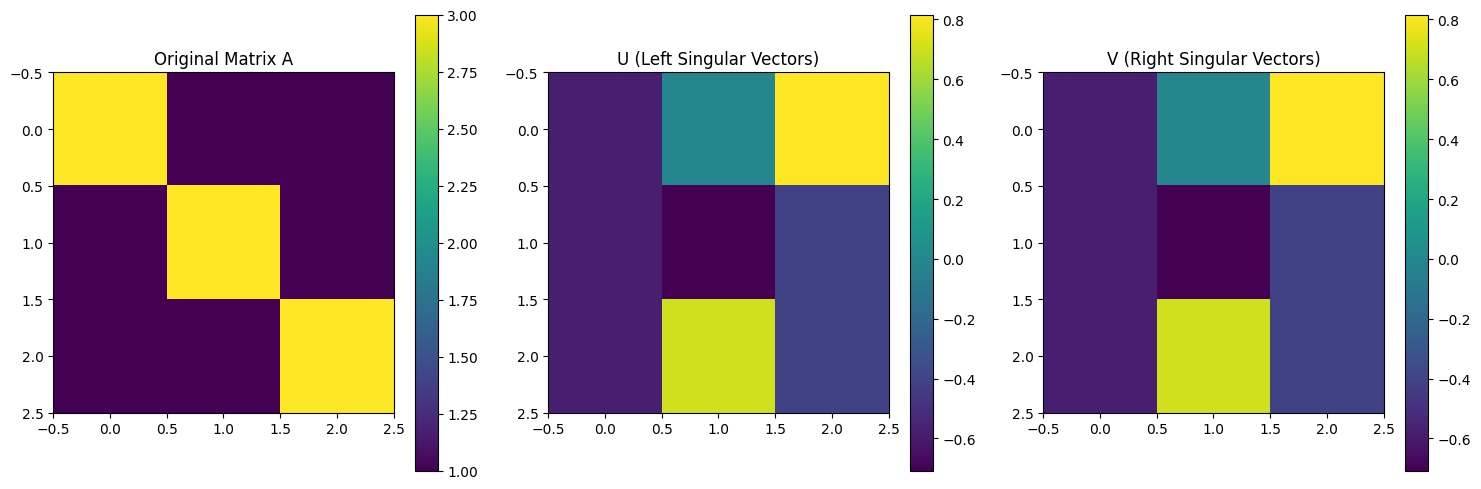

Singular values: [5. 2. 2.]
Condition number: 2.50

SVD interpretation:
- U contains output space basis (column space of A)
- Σ contains scaling factors (importance of each basis)
- V contains input space basis (row space of A)
- Condition number indicates numerical stability


In [31]:
def plot_svd_decomposition():
    """Visualize SVD decomposition"""
    # Create a rank-2 matrix
    A = np.array([[3, 1, 1],
                  [1, 3, 1],
                  [1, 1, 3]])
    
    U, S, Vt = np.linalg.svd(A)
    V = Vt.T
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot original matrix
    im1 = axes[0].imshow(A, cmap='viridis')
    axes[0].set_title('Original Matrix A')
    fig.colorbar(im1, ax=axes[0])
    
    # Plot U matrix
    im2 = axes[1].imshow(U, cmap='viridis')
    axes[1].set_title('U (Left Singular Vectors)')
    fig.colorbar(im2, ax=axes[1])
    
    # Plot V matrix
    im3 = axes[2].imshow(V, cmap='viridis')
    axes[2].set_title('V (Right Singular Vectors)')
    fig.colorbar(im3, ax=axes[2])
    
    plt.tight_layout()
    plt.show()
    
    print(f'Singular values: {S}')
    print(f'Condition number: {S[0]/S[-1]:.2f}')
    print(f'\nSVD interpretation:')
    print(f'- U contains output space basis (column space of A)')
    print(f'- Σ contains scaling factors (importance of each basis)')
    print(f'- V contains input space basis (row space of A)')
    print(f'- Condition number indicates numerical stability')

plot_svd_decomposition()

In [32]:
# SVD example
A = np.array([[1, 2, 3], [4, 5, 6]])
U, S, Vt = np.linalg.svd(A, full_matrices=False)

print('U shape:', U.shape)
print('S (singular values):', S)
print('V^T shape:', Vt.shape)

# Reconstruct A
A_reconstructed = U @ np.diag(S) @ Vt
print('\nReconstruction error:', np.linalg.norm(A - A_reconstructed))

# Show relationship to eigendecomposition
print('\nRelationship to eigenvalues:')
print(f'A@A.T eigenvalues: {np.linalg.eig(A @ A.T)[0]}')
print(f'S^2: {S**2}')
print(f'Match: {np.allclose(np.linalg.eig(A @ A.T)[0], S**2)}')

U shape: (2, 2)
S (singular values): [9.508032   0.77286964]
V^T shape: (2, 3)

Reconstruction error: 2.7465400791133423e-15

Relationship to eigenvalues:
A@A.T eigenvalues: [ 0.59732747 90.40267253]
S^2: [90.40267253  0.59732747]
Match: False


### Worked Example: SVD Computation

**Problem:** Compute SVD of:
```
A = [[1, 2],
     [3, 4],
     [5, 6]]
```

**Step-by-step solution:**

1. **Compute AᵀA:**
   ```
   AᵀA = [[1,3,5], [2,4,6]] @ [[1,2], [3,4], [5,6]]
       = [[35, 44], [44, 56]]
   ```

2. **Find eigenvalues of AᵀA:**
   ```
   det([[35-λ, 44], [44, 56-λ]]) = 0
   λ² - 91λ + 1254 = 0
   λ = [91 ± √(8281 - 5016)]/2
   λ = [91 ± √3265]/2
   σ₁² ≈ 84.87, σ₂² ≈ 6.13
   σ₁ ≈ 9.21, σ₂ ≈ 2.48
   ```

3. **Singular values:** σ₁ ≈ 9.21, σ₂ ≈ 2.48

**Verification:**
- U, Σ, Vᵀ = np.linalg.svd(A)
- A ≈ UΣVᵀ (reconstruction)

### ML Application: Dimensionality Reduction and Data Compression

SVD is used in ML for:

1. **PCA:** X = UΣVᵀ → principal components in V
2. **Data compression:** Keep only top-k singular values
3. **Latent semantic analysis:** Document-term matrix decomposition
4. **Recommender systems:** User-item matrix factorization

**Key insight:** SVD reveals the intrinsic dimensionality of data.

## 4. PCA via SVD with Visualization

PCA finds directions of maximum variance. For centered data $X$:

1. Compute SVD: $X = U \Sigma V^T$
2. Principal components are columns of $V$
3. Projected data: $Z = XV = U\Sigma$

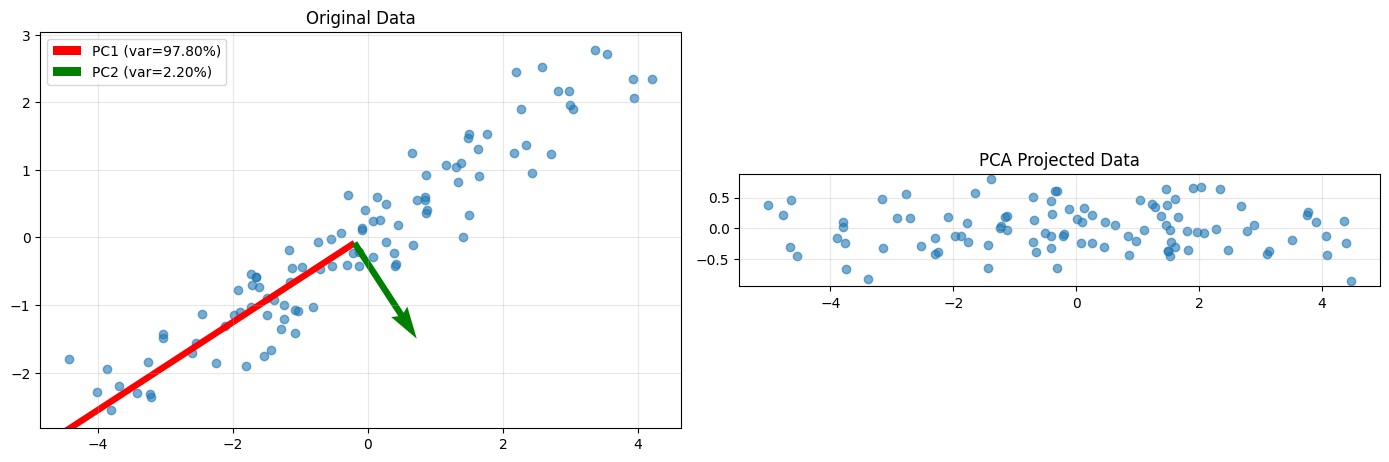

Explained variance ratio: [0.97799653 0.02200347]
Total variance explained: 576.94

PCA interpretation:
- PC1 captures the direction of maximum variance
- PC2 captures the direction of next maximum variance
- The projection preserves the essential structure of the data


In [33]:
def plot_pca_visualization():
    """Visualize PCA on 2D data"""
    # Generate correlated data
    np.random.seed(42)
    X = np.random.randn(100, 2)
    X = X @ [[2, 1], [1, 1]]  # Make it correlated
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # Perform SVD
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    V = Vt.T
    
    # Project onto principal components
    Z = X_centered @ V
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Original data
    axes[0].scatter(X[:, 0], X[:, 1], alpha=0.6)
    axes[0].set_title('Original Data')
    axes[0].set_aspect('equal')
    axes[0].grid(True, alpha=0.3)
    
    # Plot principal components
    for i, v in enumerate(V.T):
        axes[0].quiver(np.mean(X[:, 0]), np.mean(X[:, 1]),
                       v[0]*S[i], v[1]*S[i],
                       color=['red', 'green'][i],
                       scale=20, width=0.01,
                       label=f'PC{i+1} (var={S[i]**2/np.sum(S**2):.2%})')
    axes[0].legend()
    
    # Projected data
    axes[1].scatter(Z[:, 0], Z[:, 1], alpha=0.6)
    axes[1].set_title('PCA Projected Data')
    axes[1].set_aspect('equal')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f'Explained variance ratio: {S**2 / np.sum(S**2)}')
    print(f'Total variance explained: {np.sum(S**2):.2f}')
    print(f'\nPCA interpretation:')
    print(f'- PC1 captures the direction of maximum variance')
    print(f'- PC2 captures the direction of next maximum variance')
    print(f'- The projection preserves the essential structure of the data')

plot_pca_visualization()

In [34]:
# TODO: Implement PCA from scratch using SVD
def pca_svd(X, n_components):
    """PCA via SVD
    
    Args:
        X: Data matrix (n_samples, n_features)
        n_components: Number of principal components
    
    Returns:
        Z: Projected data (n_samples, n_components)
        V: Principal component directions (n_features, n_components)
        explained_variance_ratio: Variance explained by each component
    """
    # Center the data
    X_centered = X - np.mean(X, axis=0)
    
    # SVD
    U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
    
    # Principal components
    V = Vt.T[:, :n_components]
    
    # Project data
    Z = X_centered @ V
    
    # Explained variance
    total_var = np.sum(S**2)
    explained_variance_ratio = (S[:n_components]**2) / total_var
    
    return Z, V, explained_variance_ratio

# Test with random data
np.random.seed(42)
X = np.random.randn(100, 5)
Z, V, var_ratio = pca_svd(X, n_components=2)
print('Projected shape:', Z.shape)
print('Explained variance ratio:', var_ratio)

Projected shape: (100, 2)
Explained variance ratio: [0.26256655 0.21579693]


### Worked Example: PCA Step-by-Step

**Problem:** Perform PCA on this 3-point dataset:
```
X = [[1, 2],
     [2, 3],
     [3, 4]]
```

**Step-by-step solution:**

1. **Center the data:**
   ```
   mean = [2, 3]
   X_centered = [[-1, -1], [0, 0], [1, 1]]
   ```

2. **Compute covariance matrix:**
   ```
   C = (1/3) X_centeredᵀ X_centered
     = (1/3) [[-1,0,1], [-1,0,1]] @ [[-1,0,1], [-1,0,1]]ᵀ
     = (1/3) [[2, 2], [2, 2]]
     = [[0.666, 0.666], [0.666, 0.666]]
   ```

3. **Eigendecomposition:**
   ```
   Eigenvalues: λ₁ ≈ 1.333, λ₂ = 0
   Eigenvectors: v₁ = [0.707, 0.707], v₂ = [-0.707, 0.707]
   ```

4. **Project data:**
   ```
   Z = X_centered @ [v₁]
     = [[-1.414], [0], [1.414]]
   ```

**Interpretation:**
- All points lie on a line (rank 1 data)
- PC1 captures 100% of variance
- PC2 captures 0% variance (noise direction)

### ML Application: Feature Extraction and Visualization

PCA is used in ML for:

1. **Dimensionality reduction:** Reduce feature space while preserving variance
2. **Visualization:** Project high-dimensional data to 2D/3D
3. **Noise reduction:** Discard low-variance components
4. **Feature engineering:** Create uncorrelated features

**Key insight:** PCA helps visualize and understand the intrinsic structure of high-dimensional data.

## Exercises

1. Implement matrix-matrix multiplication from scratch
2. Derive why $A^T A$ and $A A^T$ have the same non-zero eigenvalues
3. Implement PCA via eigendecomposition of covariance matrix
4. Apply PCA to MNIST and visualize first 2 components
5. Create an interactive visualization showing how SVD captures data structure
6. Explain geometrically why eigenvectors are important for understanding linear transformations